# Chess program

## Import

- Luxor for graphical interface
- Colors for board color

In [1]:
using Luxor
using Colors

## Create board

In [2]:
function createboard()
    board = Array{Char, 2}(8, 8)
    fill!(board, ' ')
    board[1,1] = '♖'
    board[2,1] = '♘'
    board[3,1] = '♗'
    board[4,1] = '♕'
    board[5,1] = '♔'
    board[6,1] = '♗'
    board[7,1] = '♘'
    board[8,1] = '♖'
    for i in 1:8
        board[i, 2] = '♙'
        board[i, 7] = '♟'
    end
    board[1,8] = '♜'
    board[2,8] = '♞'
    board[3,8] = '♝'
    board[4,8] = '♛'
    board[5,8] = '♚'
    board[6,8] = '♝'
    board[7,8] = '♞'
    board[8,8] = '♜'
    board
end

createboard (generic function with 1 method)

In [3]:
board = createboard()

8×8 Array{Char,2}:
 '♖'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♜'
 '♘'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♞'
 '♗'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♝'
 '♕'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♛'
 '♔'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♚'
 '♗'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♝'
 '♘'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♞'
 '♖'  '♙'  ' '  ' '  ' '  ' '  '♟'  '♜'

## Add a `draw` function for a chessboard

In [4]:
function draw(board::Array{Char, 2})
    t = Table(10, 10, 50, 50)
    setcolor("gray")
    for i in 1:8
        for j in 1:8
            if i % 2 == 0 && j % 2 == 1 || i % 2 == 1 && j % 2 == 0
                setcolor("navajowhite")
            else
                setcolor("sandybrown")
            end
            n = 10*(9-i)+j+1 
            box(t[n], t.colwidths[t.currentcol], t.rowheights[t.currentrow], :fill)
        end
    end
    setcolor("black")
    for i in 1:8
        for j in 1:8
            n = 10*(9-i)+j+1
            fontsize(t.rowheights[t.currentrow]*2/3)
            text(string(board[j, i]), t[n]-(5,0), halign=:center, valign=:middle)
        end
    end
    for i in 1:8
        n = 10*(9-i)+1
        fontsize(t.rowheights[t.currentrow]/2)
        text(string(i), t[n], halign=:center, valign=:middle)
    end
    for (j, c) in enumerate("abcdefgh")
        n = 91+j
        fontsize(t.rowheights[t.currentrow]/2)
        text(string(c), t[n], halign=:center, valign=:middle)
    end
end

draw (generic function with 1 method)

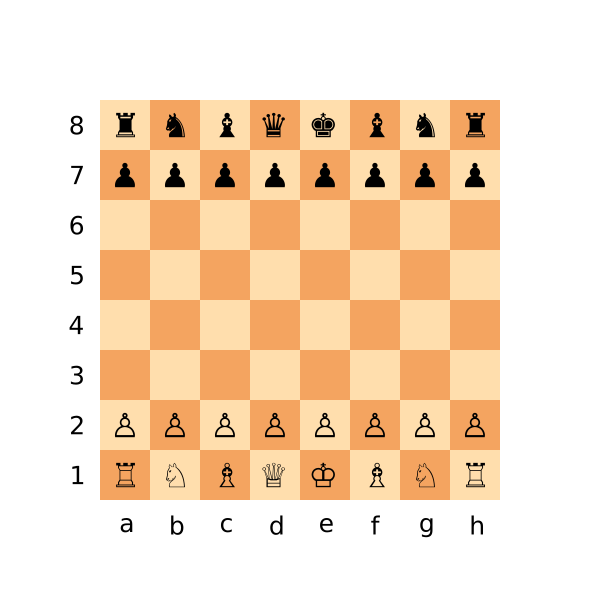

In [5]:
@svg begin
    draw(board)
end

## Game logic

In [6]:
function domove(board::Array{Char, 2}, whitemove::Bool, move::String)
    x₀, y₀, x₁, y₁, capture = parsemove(move)
    if !isvalidmove(board, x₀, y₀, x₁, y₁, capture, whitemove)
        error("Move is not valid!")
    end
    board[x₁, y₁] = board[x₀, y₀]
    board[x₀, y₀] = ' '
    !whitemove
end

domove (generic function with 1 method)

## Parse input

In [7]:
function parsemove(move::String)
    x₀ = Int(move[1])-96
    y₀ = parse(Int, move[2])
    x₁ = Int(move[3])-96
    y₁ = parse(Int, move[4])
    capture = ' '
    if length(move) == 5
        capture = move[5]
    end
    @assert(1 ≤ x₀ ≤ 8, "Movement can not be parsed!")
    @assert(1 ≤ y₀ ≤ 8, "Movement can not be parsed!")
    @assert(1 ≤ x₁ ≤ 8, "Movement can not be parsed!")
    @assert(1 ≤ y₁ ≤ 8, "Movement can not be parsed!")
    x₀, y₀, x₁, y₁, capture
end

parsemove (generic function with 1 method)

## Validate move

In [8]:
function isvalidmove(board::Array{Char, 2}, x₀::Int64, y₀::Int64, x₁::Int64, y₁::Int64, capture::Char, whitemove::Bool)
    piece = board[x₀, y₀]
    if whitemove
        if piece == '♙'
            if isverticalmove(x₀, y₀, x₁, y₁) && movedistance(x₀, y₀, x₁, y₁, true) == 1
                return board[x₁, y₁] == ' '
            elseif isverticalmove(x₀, y₀, x₁, y₁) && y₀ == 2 && movedistance(x₀, y₀, x₁, y₁, true) == 2
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] == ' '
                end
            elseif isdiagonalmove(x₀, y₀, x₁, y₁) && movedistance(x₀, y₀, x₁, y₁, true) == 2
                return board[x₁, y₁] ∈ "♜♞♝♛♚♟"
            end
        elseif piece == '♗'
            if isdiagonalmove(x₀, y₀, x₁, y₁)
                println("ok")
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] ∈ " ♜♞♝♛♚♟"
                end
            end
        elseif piece == '♖'
            if isverticalmove(x₀, y₀, x₁, y₁) || ishorizontalmove(x₀, y₀, x₁, y₁)
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] ∈ " ♜♞♝♛♚♟"
                end
            end
        elseif piece == '♘'
            if movedistance(x₀, y₀, x₁, y₁) == 3 && !ishorizontalmove(x₀, y₀, x₁, y₁) &&
                !isverticalmove(x₀, y₀, x₁, y₁) && !isdiagonalmove(x₀, y₀, x₁, y₁)
                return board[x₁, y₁] ∈ " ♜♞♝♛♚♟"
            end
        elseif piece == '♕'
            if isverticalmove(x₀, y₀, x₁, y₁) || ishorizontalmove(x₀, y₀, x₁, y₁) || 
                isdiagonalmove(x₀, y₀, x₁, y₁)
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] ∈ " ♜♞♝♛♚♟"
                end
            end
        elseif piece == '♔'
            if 1 ≤ movedistance(x₀, y₀, x₁, y₁) ≤ 2
                return board[x₁, y₁] ∈ " ♜♞♝♛♚♟"
            end
        end
    else
        if piece == '♟'
            if isverticalmove(x₀, y₀, x₁, y₁) && movedistance(x₀, y₀, x₁, y₁, true) == -1
                return board[x₁, y₁] == ' '
            elseif isverticalmove(x₀, y₀, x₁, y₁) && y₀ == 7 && movedistance(x₀, y₀, x₁, y₁, true) == -2
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] == ' '
                end
            elseif isdiagonalmove(x₀, y₀, x₁, y₁) && movedistance(x₀, y₀, x₁, y₁, true) == 2
                return board[x₁, y₁] ∈ "♖♘♗♕♔♙"
            end
        elseif piece == '♝'
            if isdiagonalmove(x₀, y₀, x₁, y₁)
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] ∈ " ♖♘♗♕♔♙"
                end
            end
        elseif piece == '♜'
            if isverticalmove(x₀, y₀, x₁, y₁) || ishorizontalmove(x₀, y₀, x₁, y₁)
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] ∈ " ♖♘♗♕♔♙"
                end
            end
        elseif piece == '♞'
            if movedistance(x₀, y₀, x₁, y₁) == 3 && !ishorizontalmove(x₀, y₀, x₁, y₁) &&
                !isverticalmove(x₀, y₀, x₁, y₁) && !isdiagonalmove(x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] ∈ " ♖♘♗♕♔♙"
            end
        elseif piece == '♛'
            if isverticalmove(x₀, y₀, x₁, y₁) || ishorizontalmove(x₀, y₀, x₁, y₁) || 
                isdiagonalmove(x₀, y₀, x₁, y₁)
                if nopiecesinbetween(board, x₀, y₀, x₁, y₁)
                    return board[x₁, y₁] ∈ " ♖♘♗♕♔♙"
                end
            end
        elseif piece == '♚'
            if 1 ≤ movedistance(x₀, y₀, x₁, y₁) ≤ 2
                return board[x₁, y₁] ∈ " ♖♘♗♕♔♙"
            end
        end
    end
    false
end

function movedistance(x₀::Int64, y₀::Int64, x₁::Int64, y₁::Int64, oriented::Bool=false)
    if oriented
        return x₁-x₀ + y₁-y₀
    end
    abs(x₁-x₀) + abs(y₁-y₀)
end

function isverticalmove(x₀::Int64, y₀::Int64, x₁::Int64, y₁::Int64)
   x₀ == x₁ && y₀ ≠ y₁
end

function ishorizontalmove(x₀::Int64, y₀::Int64, x₁::Int64, y₁::Int64)
   x₀ ≠ x₁ && y₀ == y₁
end

function isdiagonalmove(x₀::Int64, y₀::Int64, x₁::Int64, y₁::Int64)
    x₀ ≠ x₁ && y₀ ≠ y₁ && max(x₀, x₁) - min(x₀, x₁) == max(y₀, y₁) - min(y₀, y₁)
end

function nopiecesinbetween(board::Array{Char, 2}, x₀::Int64, y₀::Int64, x₁::Int64, y₁::Int64)
    δx = sign(x₁ - x₀)
    δy = sign(y₁ - y₀)
    n = max(abs(x₁ - x₀), abs(y₁ - y₀))
    x = x₀
    y = y₀
    for i in 1:n-1
        x = x + δx
        y = y + δy
        if board[x, y] ≠ ' '
            return false
        end
    end
    true
end

nopiecesinbetween (generic function with 1 method)

## Frontend that displays board between moves

In [9]:
function play()
        board = createboard()
        whitemove = true
        msg = ""
        str = ""
        while true
            if whitemove
                msg = "White move: $msg"
            else
                msg = "Black move: $msg"
            end
            @png begin
                draw(board)
                text(msg, Point(-230, -220))
            end 480 480
            print(" ")       # Hack to always display the 
            flush(STDOUT)    # input box
            str = readline()
            if str == "done"
                break
            end
            try
                whitemove = domove(board, whitemove, str)
                msg = ""
            catch
                msg = "$str is not valid! "
            end
        end
    end

play (generic function with 1 method)

## Example game

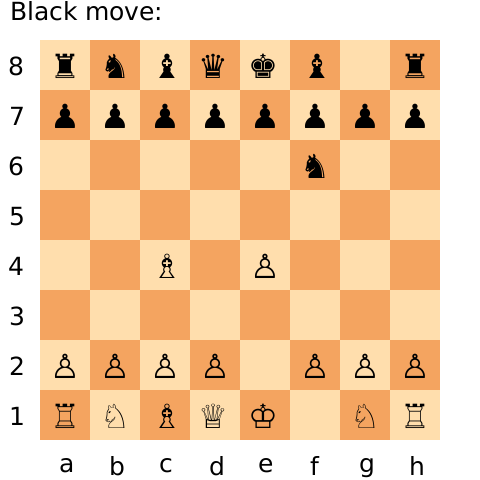

In [11]:
play()